In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf


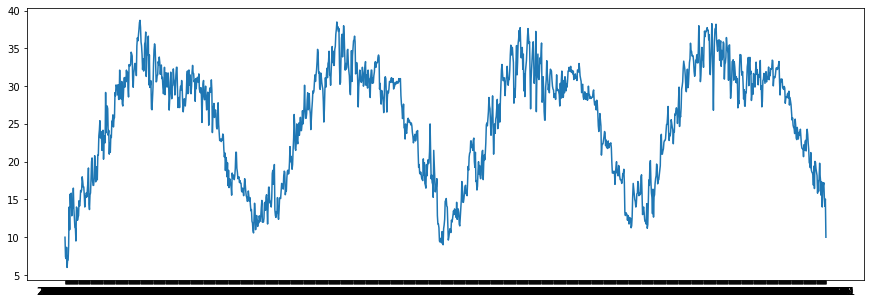

In [3]:
df_train : pd.DataFrame = pd.read_csv("DailyDelhiClimateTrain.csv")
df_train.head()


dates : np.array = df_train["date"].values
temp : np.array = df_train["meantemp"].values

plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.show()

In [34]:
def windowed_dataset(series : np.array, window_size : int, batch_size : int, shuffle_buffer : int ):
    """
    Do A windowing to a dataset, jadi basically cuman 

    Args:
        series (np.array): _description_
        window_size (int): get i-window_size ==> [ 0 - window_size, 1 - window_size+1, 2 - windows_size+2] {0-61, 1-62,2-63} 
        batch_size (int): ini batch untuk setiap dataset
        shuffle_buffer (int): _description_
    """


    series = tf.expand_dims(series, axis=-1) # Add 1 Dimension
    ds : tf.data.Dataset = tf.data.Dataset.from_tensor_slices(series) # Create a tf dataset
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True) # For doing windowing
    ds = ds.flat_map(lambda w : w.batch(window_size + 1)) # BATCH dahulu baru di flatten jadi 1D but still => [ [b1_60] , [b2_61], [...] ]
    ds = ds.shuffle(shuffle_buffer) ## I dont know but this one here is shuffeling the flatten dataset but only the 1D array not its content i suppose
    ds = ds.map(lambda w : (w[:-1], w[-1:])) # I dont know but this is create a FEATURE AND LABEL 
    return ds.batch(batch_size).prefetch(1)


train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)






Epoch 1/100
15/15 [==============================] - 4s 66ms/step - loss: 19.6222 - mae: 20.1212
Epoch 2/100
15/15 [==============================] - 1s 49ms/step - loss: 8.8658 - mae: 9.3531
Epoch 3/100
15/15 [==============================] - 1s 46ms/step - loss: 6.3879 - mae: 6.8740
Epoch 4/100
15/15 [==============================] - 1s 48ms/step - loss: 5.0091 - mae: 5.4906
Epoch 5/100
15/15 [==============================] - 1s 51ms/step - loss: 7.0080 - mae: 7.4949
Epoch 6/100
15/15 [==============================] - 1s 49ms/step - loss: 5.9178 - mae: 6.4019
Epoch 7/100
15/15 [==============================] - 1s 51ms/step - loss: 7.3642 - mae: 7.8518
Epoch 8/100
15/15 [==============================] - 1s 46ms/step - loss: 4.6395 - mae: 5.1182
Epoch 9/100
15/15 [==============================] - 1s 49ms/step - loss: 5.1797 - mae: 5.6597
Epoch 10/100
15/15 [==============================] - 1s 52ms/step - loss: 4.0846 - mae: 4.5612
Epoch 11/100
15/15 [===========================